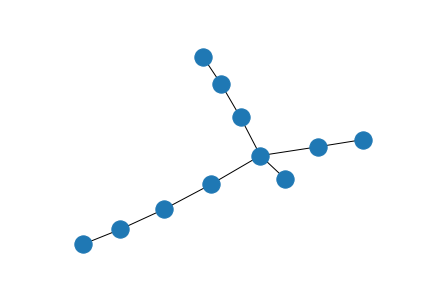

Looping at depth 0 
node: Root, 	goal G3, 	depth: 0
Result: None, 	Goal: G3

Looping at depth 1 
node: Root, 	goal G3, 	depth: 1
Looping through children: ['CSK', 'GT', 'PBKS', 'KKR']
node: CSK, 	goal G3, 	depth: 0
node: GT, 	goal G3, 	depth: 0
node: PBKS, 	goal G3, 	depth: 0
node: KKR, 	goal G3, 	depth: 0
Result: None, 	Goal: G3

Looping at depth 2 
node: Root, 	goal G3, 	depth: 2
Looping through children: ['CSK', 'GT', 'PBKS', 'KKR']
node: CSK, 	goal G3, 	depth: 1
Looping through children: []
node: GT, 	goal G3, 	depth: 1
Looping through children: ['G1']
node: G1, 	goal G3, 	depth: 0
node: PBKS, 	goal G3, 	depth: 1
Looping through children: ['P1']
node: P1, 	goal G3, 	depth: 0
node: KKR, 	goal G3, 	depth: 1
Looping through children: ['K1']
node: K1, 	goal G3, 	depth: 0
Result: None, 	Goal: G3

Looping at depth 3 
node: Root, 	goal G3, 	depth: 3
Looping through children: ['CSK', 'GT', 'PBKS', 'KKR']
node: CSK, 	goal G3, 	depth: 2
Looping through children: []
node: GT, 	goal G3, 	depth

In [62]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'Root' : ['CSK', 'GT', 'PBKS','KKR'],
    'CSK' : [],
    'GT' : ['G1'],
    'G1' : ['G2'],
    'G2' : ['G3'],
    'PBKS' : ['P1'],
    'KKR' : ['K1'],
    'K1' : ['K2'],
}

GR = nx.Graph(graph)
nx.draw(GR)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

c = g = p = k = 0

def IDS(root, goal):
    IDS.total_itr = 0
    IDS.wins = [c, g, p, k]
    depth = 0
    while True:
        print("Looping at depth %i " % (depth))
        result = DLS(root, goal, depth)
        print("Result: %s, \tGoal: %s" % (result, goal))
        print()
        IDS.total_itr += 1
        if result == goal:
            return result
        depth = depth + 1
        

def DLS(node, goal, depth):
    print("node: %s, \tgoal %s, \tdepth: %i" % (node, goal, depth))

    if depth == 0 and node == goal:
        print(" --- Found goal, returning --- ")
        return node
    elif depth > 0:
        print("Looping through children: %s" % (graph.get(node, [])))

        for child in graph.get(node, []):

            if bool(re.search("^C.*", str(node))):
                IDS.wins[0] += 1
            if bool(re.search("^G.*", str(node))):
                IDS.wins[1] += 1
            if bool(re.search("^P.*", str(node))):
                IDS.wins[2] += 1
            if bool(re.search("^K.*", str(node))):
                IDS.wins[3] += 1

            if goal == DLS(child, goal, depth-1):
                return goal

IDS('Root', 'G3')
print("Total iterations = ", IDS.total_itr - 1)

result = {
    "CSK": math.ceil(IDS.wins[0]/2),
    "GT": math.ceil(IDS.wins[1]/2),
    "PBKS": math.ceil(IDS.wins[2]/2),
    "KKR": math.ceil(IDS.wins[3]/2)
}

print("Results are: ", result)
winner = max(zip(result.values(), result.keys()))[1]
print("The winner is: ", winner)
